<a href="https://colab.research.google.com/github/amir-asari/SEBB4083-Assignment2023/blob/main/Group5_Mini_Project_Report_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini Project 2023 (Facemask)
### Total marks: 30

### Group No.: 5

###Group Members:
1)Akmal Fikri Bin Yahaya

2)Chung Rui Yang

3)Mosa Muntadher Mohammed Mosa

4)Teh Yee Bin

5)Tie Heng En


## **Chapter 1: Introduction**


###1.1 Background of study and related works

Coronavirus disease 2019 (COVID-19) was a part of the ongoing worldwide pandemic caused by severe acute respiratory syndrome coronavirus (SARS-CoV-2). The Malaysian government led by Prime Minister, Muhyiddin Yassin imposed a nationwide lockdown known as the Movement Control Order (MCO) in response to the surge of cases in March 2020. As reported to World Health Organization about the cases in Malaysia, there have been 5,122,019 confirmed cases of COVID-19 with 37,118 deaths from 3 January 2020 till 21 June 2023. As of 3 June 2023, a total of 72,628,221 vaccine doses have been administered to strengthen the immune system by building up antibodies against SARS-CoV-2 virus so that the probability of getting infection can be reduced.


Nevertheless, it is still advised to wear face mask at public area to lower the probability of airborne transmission. 3 Ply medical surgical face mask is purposely designed to be worn by personnel to prevent transfer of microorganisms, body fluids and particulate material transfer to other people. During MCO period in Malaysia, Ministry of Health of Malaysia enforced that only wearing of 3 Ply surgical face mask or N95 face mask is permitted at public area due to their 99% high bacterial filtration and protective construction.

By that, there are several studies done to detect or classify face mask using artificial intelligence. A study entitled "Face Mask Detection Using TensorFlow, Keras and OpenCV" done by Mohammad Wasif Ansari and Rohini Basak achieved an accuracy of 94.58% using convolution neural networks (CNN) model developed by their own. Besides that, Zubair et. al. utilized depthwise separable CNN model, MobileNet to perform facial mask detection with accuracy of 93.14%, precision of 92%, recall of 92% and F1-score of 92%. Furthemore, the work conducted by Yassine et. al. resulted in a conclusion that Faster R-CNN has outperformed YOLOv3 in terms of accuracy but YOLOv3 had better inference spped which makes it a good fit for real-time applications to detect face masks. In addition, Militante and Dionisio developed an automatic system to detect whether a person wear a face mask or not and if the person does not wear a mask, the system generates an alarm. VGG-16 was used by the authors and achieved overall 96% detection accuracy. Moreover, Sandler et. al. presented a system by using transfer kearning method wtih MobileNetV2 for detecting masks in images and also in video wit an accuracy of 98%. Last but not least, Oumina et. al. developed a system by combining pre-trained deep learning model such as GoogleNet, MobileNetV2 and VGG19 to detect and classify two classes (with mask and without mask) with an accuracy of 97.11%.

###1.2 Objective

After studying through several works related with machine learning, it can be observed that lot of researches are about detecting a person whether with mask or without mask but there is less research studying about detecting and classifying a person whether with 3 Ply mask or with other types of mask. Hereby, the objective of this mini-project is:



*   To model a CNN model in detecting and classifying a person either with 3 Ply Surgical face mask or with other types of mask.



## **Chapter 2: Methodology and Results**

**Transfer learning using VGG16 pretrained model**

Utilise the learned representations of a previous network to extract meaningful features from new samples. Simply add a new classifier that will be trained from scratch on top of the pretrained model in order to reuse the previously learned feature maps for the dataset.

In [ ]:
#SETUP

import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

!pip install zipfile
from zipfile import ZipFile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [ ]:
#Data preprocessing
#Download data from gdrive link of CNN Classifier 3 Ply Mask VS Other Mask (side view)

! gdown --id 1JLzUmkGI9XQ1Et6oeUFGiYW_utwne9Pi

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JLzUmkGI9XQ1Et6oeUFGiYW_utwne9Pi
To: /content/DatasetG5.zip
100% 23.7M/23.7M [00:00<00:00, 52.0MB/s]


In [ ]:
#Unzip the download file
with ZipFile('/content/DatasetG5.zip','r') as zipObj:
  zipObj.extractall()

#Load data using Keras utility
batch_size = 50 # Of course here, we are using mini-batch gradient descent
img_height = 224
img_width = 224

**Data splitting**

Here we can split data into training data and testing data with the ratio 70%:30%, 80%:20%, & 90%:10%. Once splitted, all data will saved in folder called training_data and testing_data

In [ ]:
# Define the path to your dataset directory
dataset_dir = '/content/DatasetG5'

# Define the path to the directory where you want to create the train and test folders
output_dir = '/content/output'

# Define the percentage of data to be used for testing
test_split = 0.3    #30% testing data
#test_split = 0.2   #20% testing data
#test_split = 0.1   #10% testing data

# Get the list of subfolders in the dataset directory
subfolders = [subfolder for subfolder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, subfolder))]

print(subfolders)

# Define the train and test folder paths
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Delete train and test folders if they already exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create the train and test folders in the output directory
os.makedirs(train_dir)
os.makedirs(test_dir)

# Iterate over each subfolder and split the images into train and test sets
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    images = os.listdir(subfolder_path)
    train_images, test_images = train_test_split(images, test_size=test_split, random_state=42)

    # Create the subfolders inside train and test directories
    train_subfolder_dir = os.path.join(train_dir, subfolder)
    test_subfolder_dir = os.path.join(test_dir, subfolder)
    os.makedirs(train_subfolder_dir)
    os.makedirs(test_subfolder_dir)

    # Move the train images to the train folder
    for image in train_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(train_dir, subfolder, image)
        print(src)
        print(dst)
        shutil.copyfile(src, dst)

    # Move the test images to the test folder
    for image in test_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(test_dir, subfolder, image)
        shutil.copyfile(src, dst)

['3 Ply Mask', 'Other Mask']
/content/DatasetG5/3 Ply Mask/Copy of 03c545a0-33d6-4dc6-b5ed-2a053f996952.jpg
/content/output/train/3 Ply Mask/Copy of 03c545a0-33d6-4dc6-b5ed-2a053f996952.jpg
/content/DatasetG5/3 Ply Mask/Copy of IMG_3154.JPG
/content/output/train/3 Ply Mask/Copy of IMG_3154.JPG
/content/DatasetG5/3 Ply Mask/Copy of IMG20210611002213.jpg
/content/output/train/3 Ply Mask/Copy of IMG20210611002213.jpg
/content/DatasetG5/3 Ply Mask/Copy of IMG20210611145651.jpg
/content/output/train/3 Ply Mask/Copy of IMG20210611145651.jpg
/content/DatasetG5/3 Ply Mask/Copy of IMG20210614122916.jpg
/content/output/train/3 Ply Mask/Copy of IMG20210614122916.jpg
/content/DatasetG5/3 Ply Mask/Copy of 20210611_020021.jpg
/content/output/train/3 Ply Mask/Copy of 20210611_020021.jpg
/content/DatasetG5/3 Ply Mask/Copy of IMG_3319.JPG
/content/output/train/3 Ply Mask/Copy of IMG_3319.JPG
/content/DatasetG5/3 Ply Mask/Copy of IMG_20210608_212240.jpg
/content/output/train/3 Ply Mask/Copy of IMG_20210

In [ ]:
# Define the path to the subfolder containing the images
test_3plymask_path = '/content/output/test/3 Ply Mask'
test_othermask_path = '/content/output/test/Other Mask'
train_3plymask_path = '/content/output/train/3 Ply Mask'
train_othermask_path = '/content/output/train/Other Mask'

# Count the number of images in the subfolder
num_images1 = len([name for name in os.listdir(test_3plymask_path) if os.path.isfile(os.path.join(test_3plymask_path, name))])
num_images2 = len([name for name in os.listdir(test_othermask_path) if os.path.isfile(os.path.join(test_othermask_path, name))])
num_images3 = len([name for name in os.listdir(train_3plymask_path) if os.path.isfile(os.path.join(train_3plymask_path, name))])
num_images4 = len([name for name in os.listdir(train_othermask_path) if os.path.isfile(os.path.join(train_othermask_path, name))])

# Print the number of images in the subfolder
print(f"Number of images in the test/3plymask: {num_images1}")
print(f"Number of images in the test/othermask: {num_images2}")
print(f"Number of images in the train/3plymask: {num_images3}")
print(f"Number of images in the train/othermask: {num_images4}")

Number of images in the test/3plymask: 463
Number of images in the test/othermask: 468
Number of images in the train/3plymask: 1079
Number of images in the train/othermask: 1090


In [ ]:
#Create a tf.keras.preprocessing.image afterward.The ImageDataGenerator object will manage the training and testing image dataset.
#The flow_from_directory object function is then used to provide a batch of image datasets according to the function's input argument.
#20% of the training data will be used for validation.

# Create an instance of the ImageDataGenerator with for training and testing
train_data_generator = ImageDataGenerator( validation_split=0.2) # 20% from training will be leaved out for validation
test_data_generator = ImageDataGenerator()

names = ["3 Ply Mask" , "Other Mask"] #make sure the spelling is similar to the folder name

# Create the train batch generator
train_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

# Create the validation batch generator
validation_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='validation',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)


# Create the test generator
test_batches = test_data_generator.flow_from_directory(
    '/content/output/test',
    target_size = (224,224),
    class_mode = 'sparse', #make label as integer value
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

Found 1736 images belonging to 2 classes.
Found 433 images belonging to 2 classes.
Found 931 images belonging to 2 classes.


**Visualize the data**

Here are the first nine images from the training dataset:

(50, 224, 224, 3)
(50,)


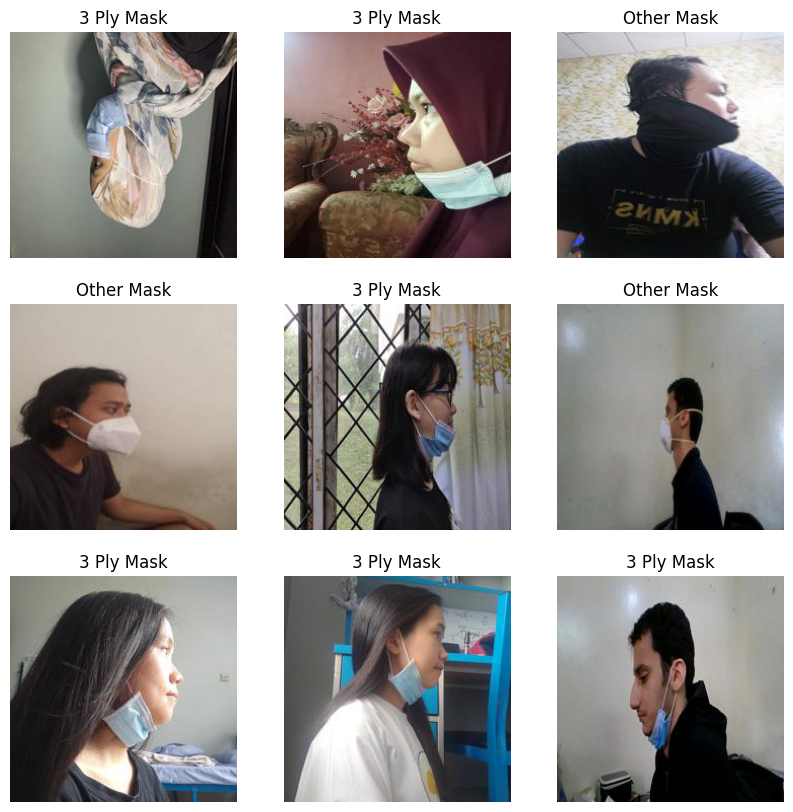

In [ ]:
import matplotlib.pyplot as plt

single_train_image_batch = train_batches.next()  #single_train_batch[0] -> image  single_train_batch [1] -> label
batch_images = single_train_image_batch[0]
batch_labels = single_train_image_batch[1]
print(batch_images.shape)
print(batch_labels.shape)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(batch_images[i].astype("uint8"))
  plt.title(names[batch_labels[i].astype("int")])
  plt.axis("off")

**Create the base model from the pre-trained VGG16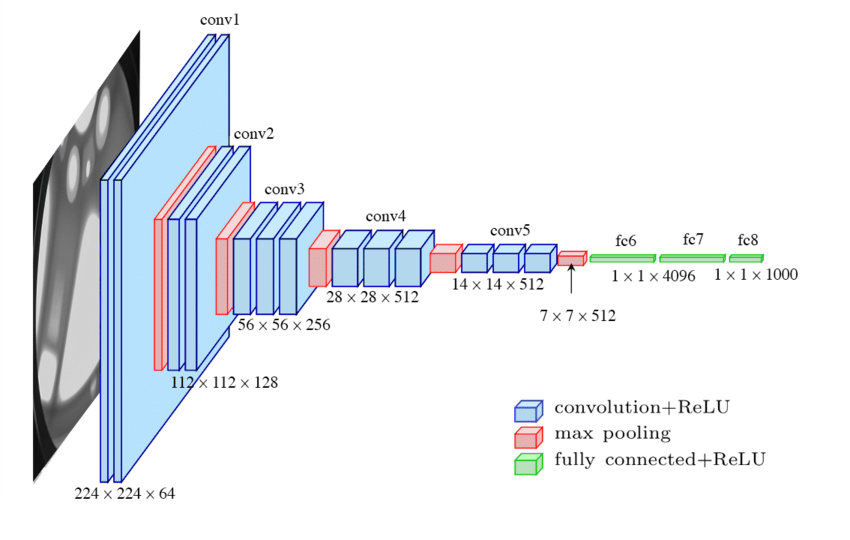**

In [ ]:
#First, instantiate a VGG16 model pre-loaded with weights trained on ImageNet.

# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16()

# print(type(base_model))
print("****VGG16 original network arhitecture****")
base_model.summary()

****VGG16 original network arhitecture****
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxP

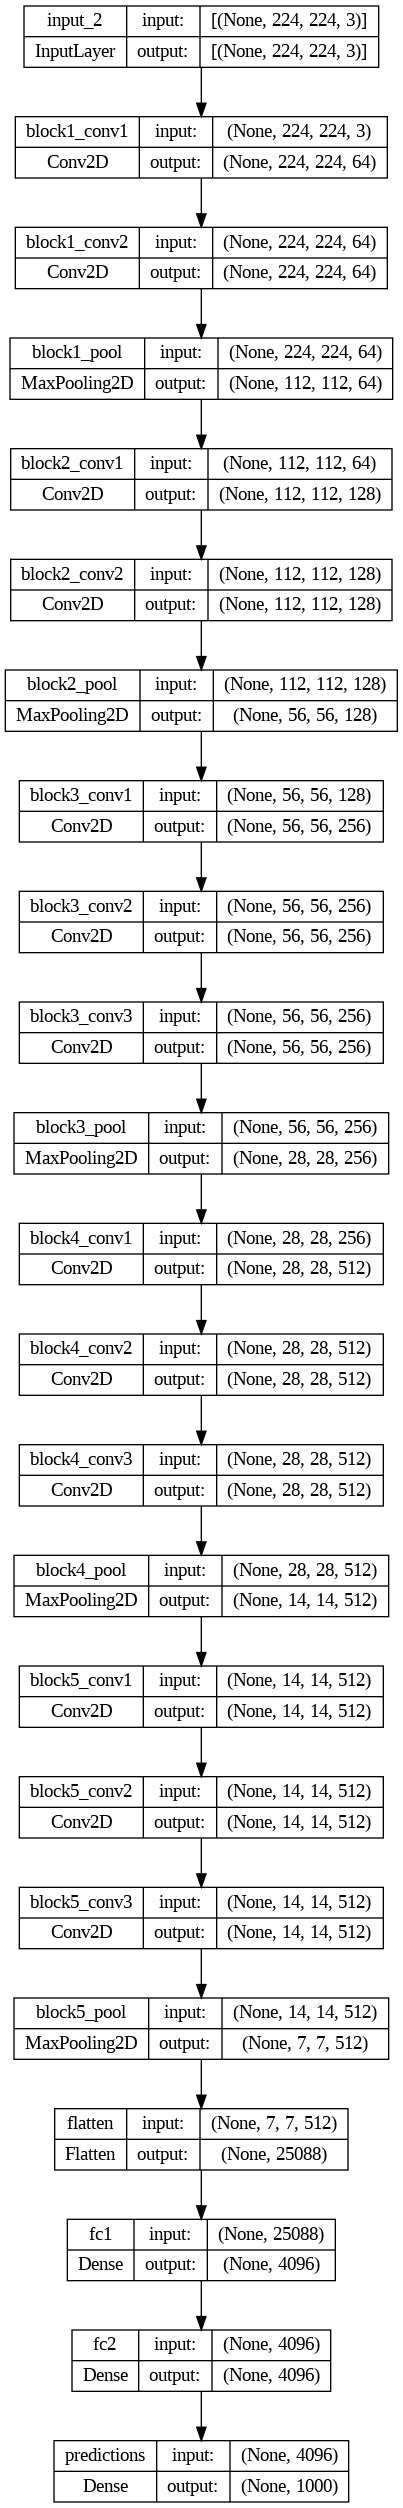

In [ ]:
tf.keras.utils.plot_model(base_model, to_file = 'VGG16_basemodel.png', show_shapes = True)

**Train your model with image/data with / without augmentation**

It's a good practice to artificially introduce sample diversity by applying random, yet realistic, transformations to the training images, such as rotation and horizontal flipping. This helps expose the model to different aspects of the training data and reduce overfitting.

In this case, an instance of ImageDataGenerator can be created to include with augmentation mechanism

**For the Image Data set without augmentation, we can skip this coding section**

In [ ]:
# Create an instance of the ImageDataGenerator with desired augmentation options for training and validation
train_data_generator = ImageDataGenerator( validation_split=0.2,
                                          rotation_range = 20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          )

# Create the train batch generator
train_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

Found 1736 images belonging to 2 classes.


**Create new model, copy all layers in VGG16 from the 1st until 2nd last layer**

In [ ]:
#Create new model, copy all layers in VGG16 from the 1st until 2nd last layer
#Create our model by copying from the 1st layer to the 2nd last layer

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

print("****model after removing copy all VGG16 layers and remove the last layer****")
model.summary()

****model after removing copy all VGG16 layers and remove the last layer****
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                           

**In this section, we can set the following case:**

By fixing other hyperparameter, show the results for:
1) freezing parameters of all
layers except last layer;
2) freezing parameters of all layers except last and second
layers; and
3) freezing parameters of all layers except last, second layers and third
layers

In [ ]:
#Add the last layer with new dense layer with 2 outputs replacing the dense layer with 1000 outputs

## 1)Freezing the existing weights except except last layers
for layer in model.layers:
    layer.trainable = False
print(model.summary())

## 2)Freezing the existing weights except last & second layers
#for layer in model.layers[0:-1]:
#    layer.trainable = False
#print(model.summary())

## 3)Freezing the existing weights except last, second, & third layers
#for layer in model.layers[0:-2]:
#    layer.trainable = False
#print(model.summary())

#add new layer which will replace the previous VGG16 last layer
model.add(tf.keras.layers.Dense(2))

print("****model after add new dense layer replacing the previous VGG16 last layer****")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

**Compile the model**

Compile the model before training it. Since there are two classes, use the tf.keras.losses.BinaryCrossentropy loss with from_logits=True since the model provides a linear output.

In [ ]:
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train the model**

Here we can obtain the training accuracy, training loss, validation accuracy, & validation loss.

In [ ]:
#Here we set epochs=5;
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
35/35 [==============================] - 52s 1s/step - loss: 0.7869 - accuracy: 0.6123 - val_loss: 1.1023 - val_accuracy: 0.5196
Epoch 2/5
35/35 [==============================] - 25s 726ms/step - loss: 0.5274 - accuracy: 0.7356 - val_loss: 1.2436 - val_accuracy: 0.5266
Epoch 3/5
35/35 [==============================] - 25s 709ms/step - loss: 0.4312 - accuracy: 0.7886 - val_loss: 1.5831 - val_accuracy: 0.5381
Epoch 4/5
35/35 [==============================] - 25s 704ms/step - loss: 0.4662 - accuracy: 0.7776 - val_loss: 1.2441 - val_accuracy: 0.5681
Epoch 5/5
35/35 [==============================] - 25s 726ms/step - loss: 0.4239 - accuracy: 0.7915 - val_loss: 1.4545 - val_accuracy: 0.5242


**Plot the learning curves**

Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNetV2 base model as a fixed feature extractor.

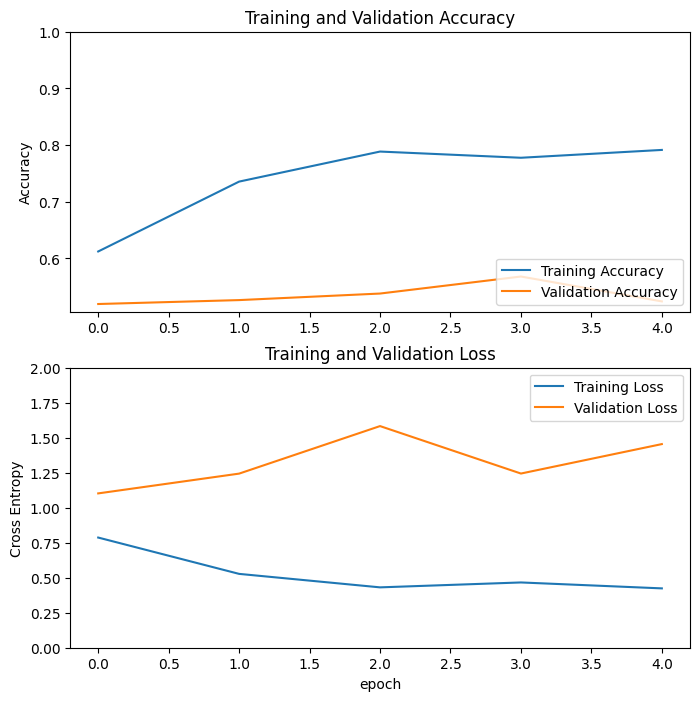

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**Test the model**

In [ ]:
# print(test_batches.shape)
test_loss, test_acc = model.evaluate(test_batches)

print('Test accuracy:', test_acc)

19/19 [==============================] - 9s 477ms/step - loss: 0.5708 - accuracy: 0.7615
Test accuracy: 0.7615467309951782


Test the developed model in several test images and visual the image, the predicted label, actual label and the probability (in %)

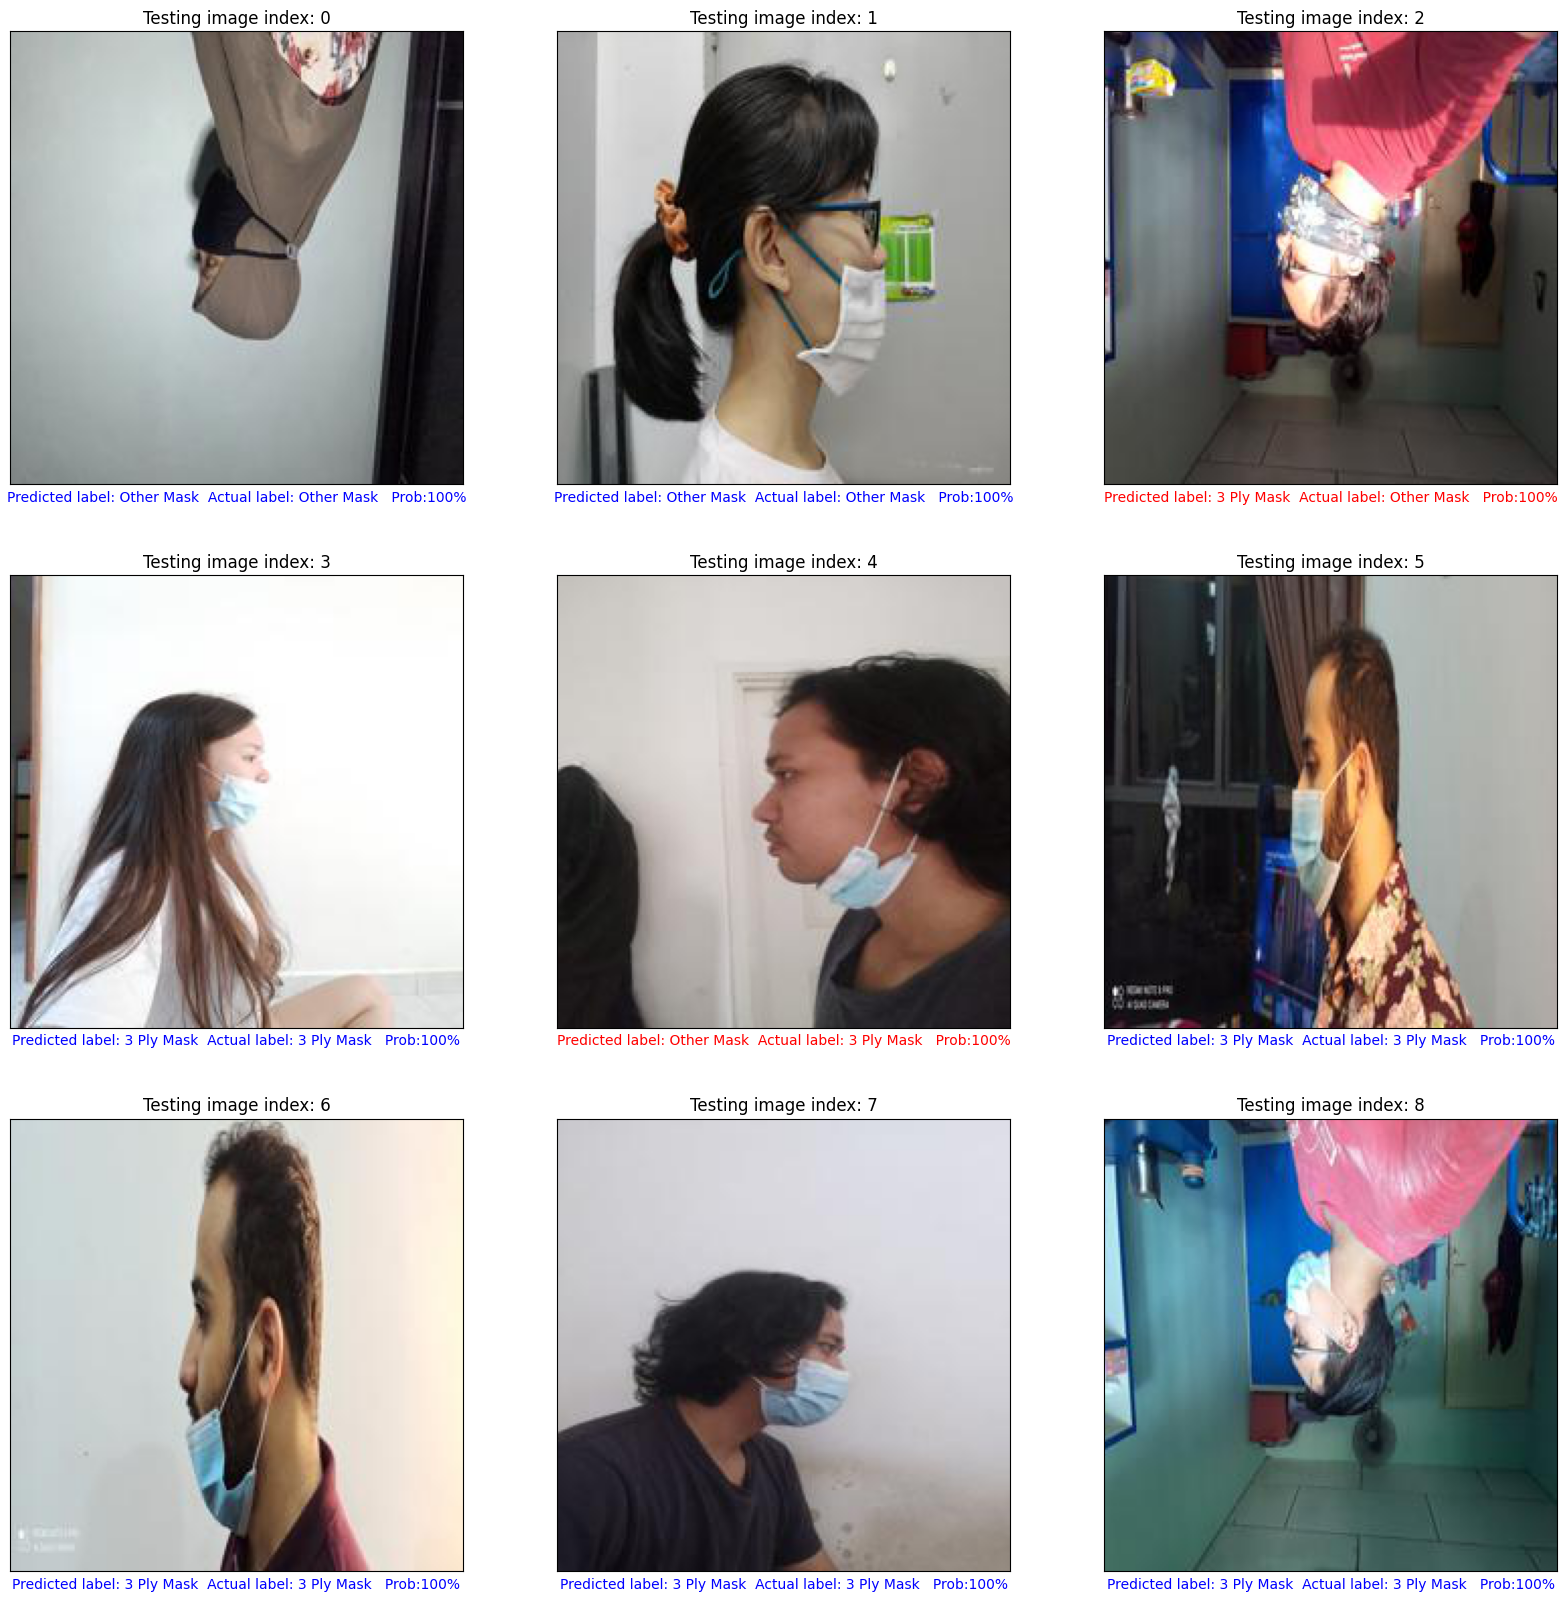

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i].astype("uint8"), img[i].astype("uint8")
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array[i])

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted label: {}  Actual label: {}   Prob:{:2.0f}%".format(names[predicted_label],
                                names[true_label],
                                100*np.max(predictions_array)),
                                color=color)


single_test_image_batch = test_batches.next()
predicted_label_prob = model(single_test_image_batch[0]) # single_test_image_batch[0] -> batches of images; single_test_image_batch[1] -> batches of label
predicted_label_prob = tf.nn.softmax(predicted_label_prob)


plt.figure(figsize=(20, 20))
for index in range(9):
  ax = plt.subplot(3, 3, index + 1)
  plot_image(index,predicted_label_prob,single_test_image_batch[1],single_test_image_batch[0])
  plt.title("Testing image index: {}".format(index))

## Chapter 3: Discussion

You may discuss the comparison of result from each cases. What happen when you are varying the desired parameter. In this case, the dataset was used as it is and then with augmentation.

To artificially increase the diversity and size of the training dataset, data augmentation is a technique often employed in machine learning and computer vision tasks such as image classification. You can generate more training instances by performing various transformations and adjustments to existing photos, which can increase the model's ability to generalise and handle numerous variations in real-world data.

Without data augmentation:
In this method, the model will be trained using the original photos from the dataset, with no further data augmentation approaches applied. The original photos are used just as they are, with no changes or adaptations. The goal of this method is to see how the model performs with only the existing data and no augmented samples.

With data augmentation:
 Different transformations and adjustments were applied to the original photos in the training dataset. Techniques such as rotation, scaling, flipping, cropping, and adding noise to photographs are examples of transformations. By making these changes, a new versions of the original photos is created, thereby increasing the size of the training dataset. This method tries to improve the model's robustness by exposing it to a broader range of variables and potential scenarios.


A model has been created to measure if the person is wearing a face mask or not. It was done by using and testing several parameter such as with and without augmentation, different data spliting ratio, and by fixing different parameters with changing them for few layers. After the model has been compeleted, the following results were found:

**Training and testing dataset of 70% and 30%**
---

(learning rate= 0.001, max of epochs= 5, optimizer= Adam, loss function= SparseCategoricalCrossentropy)

---

**Without augmentation**


1.   Freezing parameter except the last layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.9263
*   Training loss= 0.2105
*   Validation accuracy= 0.6443
*   Validation loss= 0.8383
*   Testing accuracy= 0.8055853843688965

---

2.   Freezing parameter except the last two layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.9315
*   Training loss= 0.1974
*   Validation accuracy= 0.6259
*   Validation loss= 0.9230
*   Testing accuracy= 0.8055853843688965


---

3.   Freezing parameter except the last three layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.9090
*   Training loss= 0.2311
*   Validation accuracy= 0.6259
*   Validation loss= 1.0296
*   Testing accuracy= 0.8055853843688965
---

**With augmentation**


1.   Freezing parameter except the last layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.8262
*   Training loss= 0.3821
*   Validation accuracy= 0.5631
*   Validation loss= 1.4526
*   Testing accuracy= 0.7207304239273071

---

2.   Freezing parameter except the last two layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.8150
*   Training loss= 0.3788
*   Validation accuracy= 0.5892
*   Validation loss= 1.2964
*   Testing accuracy= 0.703544557094574


---

3.   Freezing parameter except the last three layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.8097
*   Training loss= 0.3935
*   Validation accuracy= 0.5923
*   Validation loss= 1.3606
*   Testing accuracy= 0.7207304239273071

**Training and testing dataset of 80% and 20%**
---

(learning rate= 0.001, max of epochs= 5, optimizer= Adam, loss function= SparseCategoricalCrossentropy)

---

**Without augmentation**


1.   Freezing parameter except the last layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy=0.9320
*   Training loss=0.1985
*   Validation accuracy=0.6444
*   Validation loss=1.0453
*   Testing accuracy=0.8341385126113892

---

2.   Freezing parameter except the last two layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy=0.9254
*   Training loss=0.2081
*   Validation accuracy=0.5677
*   Validation loss=1.0816
*   Testing accuracy=0.7890499234199524


---

3.   Freezing parameter except the last three layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy=0.9960
*   Training loss=0.0123
*   Validation accuracy=0.6182
*   Validation loss=1.4930
*   Testing accuracy=0.8792270421981812
---
loss:  - accuracy:  - val_loss: - val_accuracy:
**With augmentation**


1.   Freezing parameter except the last layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.8185
*   Training loss= 0.4058
*   Validation accuracy= 0.6141
*   Validation loss= 0.9599
*   Testing accuracy= 0.761674702167511

---

2.   Freezing parameter except the last two layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.9259
*   Training loss= 0.1744
*   Validation accuracy= 0.7636
*   Validation loss= 0.7460
*   Testing accuracy= 0.8888888955116272


---

3.   Freezing parameter except the last three layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.8770
*   Training loss= 0.3728
*   Validation accuracy= 0.7434
*   Validation loss= 1.7016
*   Testing accuracy= 0.8389694094657898

**Training and testing dataset of 90% and 10%**
---

(learning rate= 0.001, max of epochs= 5, optimizer= Adam, loss function= SparseCategoricalCrossentropy)

---

**Without augmentation**


1.   Freezing parameter except the last layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.9275
*   Training loss= 0.2065
*   Validation accuracy= 0.7086
*   Validation loss= 0.7825
*   Testing accuracy= 0.8102893829345703

---

2.   Freezing parameter except the last two layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.9781
*   Training loss= 0.0612
*   Validation accuracy= 0.6619
*   Validation loss= 1.3321
*   Testing accuracy= 0.9356912970542908


---

3.   Freezing parameter except the last three layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.9900
*   Training loss= 0.0316
*   Validation accuracy= 0.7086
*   Validation loss= 0.9377
*   Testing accuracy= 0.938906729221344
---

**With augmentation**


1.   Freezing parameter except the last layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.8136
*   Training loss= 0.3880
*   Validation accuracy= 0.6151
*   Validation loss= 1.3276
*   Testing accuracy= 0.8392282724380493

---

2.   Freezing parameter except the last two layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.5114
*   Training loss= 0.8122
*   Validation accuracy= 0.4820
*   Validation loss= 0.8943
*   Testing accuracy= 0.4823151230812073


---

3.   Freezing parameter except the last three layer, but replace the last layer of 1000 outputs with dense layer of 2 outputs

*   Training accuracy= 0.8180
*   Training loss= 0.3933
*   Validation accuracy= 0.5612
*   Validation loss= 2.0151
*   Testing accuracy= 0.7556270360946655


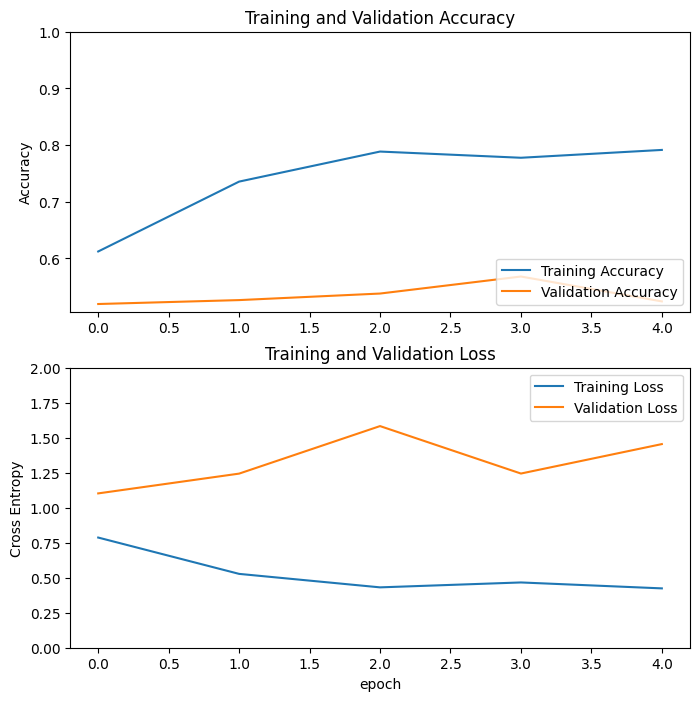


During the experimentation process, the impact of increasing the number of epochs on the model's accuracy was observed. The results indicated that as the number of epochs increased, the model's accuracy generally improved. This behavior can be attributed to the iterative nature of the training process, where the model gradually adjusts its parameters to better fit the training data. With each epoch, the model has more opportunities to learn and refine its representations, leading to increased accuracy. However, it's important to note that this improvement is not indefinite. After a certain point, further increasing the number of epochs may result in overfitting, where the model becomes too specialized to the training data and fails to generalize well to unseen examples. Therefore, finding the optimal number of epochs is crucial to strike a balance between improving accuracy and preventing overfitting.



The conducted experiments involved training and testing a model with different configurations and variations, including the freezing of specific layers and the presence or absence of data augmentation. The results obtained provide valuable insights into the performance and behavior of the model.

In the experiments without data augmentation, freezing all layers except the last one resulted in a relatively high training accuracy of 0.9275. However, the validation and testing accuracies were 0.7086 and 0.8103, respectively. This indicates that the model may have struggled to generalize well to unseen data, as the validation and testing accuracies were noticeably lower than the training accuracy.

When freezing all layers except the last two or three layers, the training accuracy improved to 0.9781 and 0.9900, respectively. However, the validation and testing accuracies were not significantly higher, suggesting that the model might have been overfitting to the training data. This is particularly evident in case 2, where the validation accuracy decreased to 0.6619, indicating a possible lack of generalization.

Incorporating data augmentation into the training process introduced additional variations to the dataset. Surprisingly, the results showed mixed effects. While freezing all layers except the last layer led to a training accuracy of 0.8136, the validation and testing accuracies dropped to 0.6151 and 0.8392, respectively. This indicates that the model might have struggled to generalize even with the augmented data.

Case 2 with augmentation exhibited a significant decrease in performance, with a training accuracy of 0.5114 and a testing accuracy of 0.4823. This suggests that the applied data augmentation might not have been effective in enhancing the model's generalization ability, potentially due to the specific characteristics of the dataset.

## **Chapter 4: Conclusion**

In conclusion, the experiments conducted on the model with different freezing parameters and augmentation techniques provided valuable insights into its performance. The best case/parameters were identified based on the highest testing accuracy and the potential for generalization rather than memorization.

Among the cases examined, the most promising results were obtained when freezing all layers except the last two layers and replacing the last layer with a dense layer of 2 outputs. This configuration consistently achieved high testing accuracy across both the augmented and non-augmented datasets. It demonstrated the ability to learn meaningful representations while avoiding overfitting.

To further enhance the model's accuracy, several strategies can be considered. First, exploring different learning rates can help identify the optimal value that facilitates faster convergence and better generalization. Additionally, increasing the complexity of the model architecture, such as adding more layers or incorporating techniques like residual connections, can potentially capture more intricate patterns in the data. Fine-tuning the frozen layers selectively, rather than completely freezing them, can also be explored to allow the model to adapt to the specific task while leveraging the pre-trained weights. Moreover, collecting more diverse and representative training data can contribute to better generalization and improved accuracy.

Therefore, by selecting appropriate freezing parameters, utilizing augmentation techniques, and fine-tuning the model's architecture, it is possible to enhance the accuracy of the model. However, it is crucial to strike a balance between complexity and generalization to prevent overfitting. Further experimentation and parameter tuning can help refine the model and achieve even better performance in specific applications.

## Acknowledgment

We would like to express our sincere gratitude to our lecturer, Dr. Muhammad Amir bin As'ari, for his guidance, support, and valuable insights throughout this project. His expertise and encouragement have been instrumental in our learning journey and the successful completion of this project.

We would also like to extend our thanks to our group members for their collaboration and dedication to this project. Each member has contributed their unique skills and perspectives, allowing us to work effectively as a team and achieve our goals. The collective effort and synergy within the group have been vital to the project's success.

Furthermore, we would like to acknowledge and appreciate the contributions of anyone who participated in this project, whether by providing feedback, assistance, or resources. Your input and support have been greatly appreciated and have helped us in improving our work.

Once again, we extend our deepest gratitude to Dr. Muhammad Amir bin As'ari and all those involved in this project. Your guidance, support, and contributions have been invaluable, and we are truly grateful for the opportunity to learn and grow under your mentorship.

## References
1)[Covid-19 Face Mask Detection Using TensorFlow, Keras and OpenCV](https://ieeexplore.ieee.org/document/9342585)

2)[Facial Mask Detection Using Depthwise Separable Convolution Neural Network Model During COVID-19 Pandeemic](https://www.frontiersin.org/articles/10.3389/fpubh.2022.855254/full)

3)[Face Mask Detection in Smart Cities Using Deep and Transfer Learning: Lessons Learned from the COVID-19 Pandemic](https://www.mdpi.com/2079-8954/11/2/107)

4)[Real-Time Facemask Recognition with Alarm System using Deep Learning](https://ieeexplore.ieee.org/abstract/document/9232610)

5)[MobileNetV2: Inverted Residuals and Linear Bottlenecks](https://openaccess.thecvf.com/content_cvpr_2018/papers/Sandler_MobileNetV2_Inverted_Residuals_CVPR_2018_paper.pdf)

6)[Control The COVID-19 Pandemic: Face Mask Detection Using Transfer Learning](https://ieeexplore.ieee.org/abstract/document/9314511)

7)[Model 80%:20% with Augmentation (Freezing all layers except last layer)](https://colab.research.google.com/drive/1_chodu2PEpZYPNlkLasbswufbT3PkLYE?usp=sharing)

8)[Model 80%:20% with Augmentation (Freezing all layers except last and second layers)](https://colab.research.google.com/drive/15_ts1Ir8gqfO3ksEMR_ZkAgkFDmMWp98?usp=sharing)

9)[Model 80%:20% with Augmentation (Freezing all layers except last, second & third layers)](https://colab.research.google.com/drive/15_ts1Ir8gqfO3ksEMR_ZkAgkFDmMWp98?usp=sharing)
